In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.optimize import curve_fit

In [71]:
galaxy_data = pd.read_csv('galaxy.csv')
poink = galaxy_data['Observed Wavelength of H-alpha']
print(len(poink))

temp = galaxy_data['RA J2000.0'].str.split(' ', expand=True)
galaxy_data['RA J2000.0'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600
temp = galaxy_data['Dec J2000.0'].str.split(' ', expand=True)
galaxy_data['Dec J2000.0'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600


1537


In [72]:
z = np.zeros(len(poink))

In [73]:
restlambda = 6562.8
for i in range(len(z)):
    z[i] = (poink[i]-restlambda)/restlambda
    #print(z[i])

In [74]:
c = 300000000
rv = np.zeros(len(z))
for i in range(len(z)):
    rv[i] = (z[i])*c

In [75]:
alpha = -1.7501625568866197
beta =  15.452961651030343

In [76]:
cepheid_data = pd.read_csv('cepheid.csv')
puls = cepheid_data['Period']
M = np.zeros(len(puls))
m = cepheid_data['Apparent Magnitude']
print(m)
d = np.zeros(1537)

0        4.395283
1       30.222261
2       30.060146
3       30.326899
4       30.468379
          ...    
4995    29.676074
4996    30.091243
4997    30.360597
4998    30.087274
4999    29.364558
Name: Apparent Magnitude, Length: 5000, dtype: float64


In [77]:
for i in range(1537):
    M[i] = (alpha*(np.log10(puls[i]))) + beta
    
for i in range(1537):
    d[i] = 10**((5 + M[i] - m[i])/5)

In [78]:
print(len(rv))
print(len(d))

1537
1537


16.409087682590457

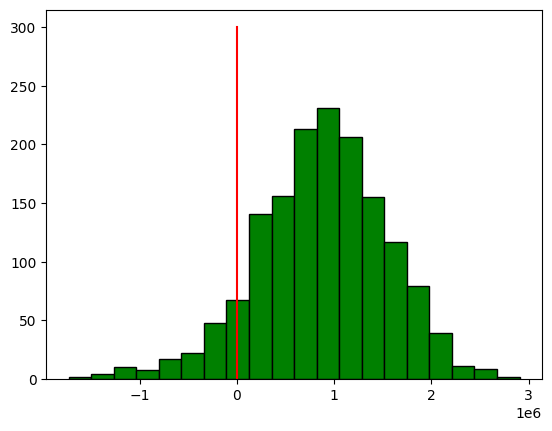

In [88]:
n,bins,patches = plt.hist(rv,bins=20,color='green',edgecolor='black')
x= np.linspace(-3,3,20)
n= 300
y = n
def gauss(x,amp,mu,sigma):
    return amp*np.exp(-(x-mu)*2/2*sigma*2)

popt,pcov = curve_fit(gauss,x,y, p0 = [300,0,20])
plt.plot(x,gauss(x,*popt),color='red')
popt[0]
popt[1]
popt[2]

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_24020\2013464125.py:6: RuntimeWarning: overflow encountered in exp
  return amp*np.exp(-(x-mu)*2/2*sigma*2)
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_24020\2013464125.py:6: RuntimeWarning: overflow encountered in multiply
  return amp*np.exp(-(x-mu)*2/2*sigma*2)


-8.814007671805904e-10

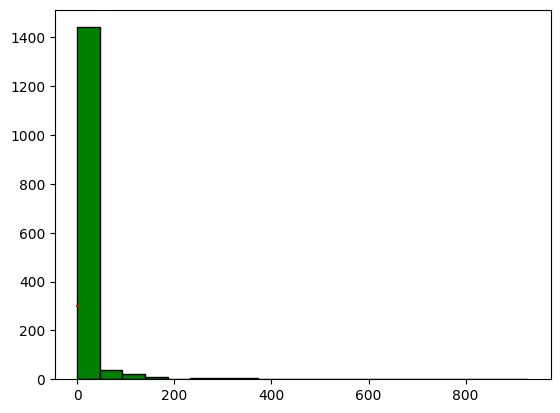

In [92]:
n,bins,patches = plt.hist(d,bins=20,color='green',edgecolor='black')
x= np.linspace(0,2,20)
n= 300
y = n
def gauss(x,amp,mu,sigma):
    return amp*np.exp(-(x-mu)*2/2*sigma*2)

popt,pcov = curve_fit(gauss,x,y, p0 = [300,0,20])
plt.plot(x,gauss(x,*popt),color='red')
popt[0]
popt[1]
popt[2]